# GENERACIÓN ARCHIVO ANALISIS HOGAR
* Se agrega la columna Suspención
 * Si la factura tiene algun cargo por suspención

In [1]:
#CARGA DE LIBRERIAS
import pandas as pd
import numpy as np 
import os 
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
dir="/home/gaades/ANALITICA_NEGOCIOS/20210301 Analisis Llamadas Facturas"

pf1 = os.path.join(dir,'2. Datos','Facturacion_Hogar_202112.csv')   
pfR = os.path.join(dir,'3. Resultado','ACLARACION_FACTURA_H01.csv')  

In [3]:
#HD = pd.read_csv(pf1, sep="|",encoding= "ISO-8859-1")
HD = pd.read_csv(pf1, sep="|",encoding= "ISO-8859-1", engine='python', error_bad_lines=False, warn_bad_lines=False)

#HD=HD.drop([2897842]) # SE ELIMINA ESTA FILA QUE TIENE INFORMACION DE TEXTO

HD.head()

,CUENTA,MES_EJECUCION,ACLARACION_FACTURA,VALOR_FACTURA_MES_ANTERIOR,VALOR_FACTURA_MES_ACTUAL,INTENCION_CANCELACION_M4,INTENCION_CANCELACION_M3,INTENCION_CANCELACION_M2,INTENCION_CANCELACION_M1,UPGRADE_TV_M4,...,ESTRATO,MESES_ACTIVO,FECHA_DX,TIPO_TV,VELOCIDAD_INTERNET,PRODUCTOS,CICLO_FACTURACION,EDAD,GENERACION,SUSPENSION
0,15551708,1122021,0,65737.0,65737,0,0,0,0,0,...,3,166,15/11/13,DIGITAL (A),40000.0,TV + @ + VOZ,2,64.0,BABY BOOMERS,0
1,16883431,1122021,0,126898.0,106900,0,0,0,0,0,...,2,165,01/09/20,DIGITAL (P),200000.0,TV + @,2,56.0,BABY BOOMERS,0
2,52059961,1122021,0,123900.0,123900,0,0,0,0,0,...,3,139,06/01/21,DIGITAL (P),200000.0,TV + @ + VOZ,1,43.0,GENERACION X,0
3,51688471,1122021,0,123335.0,107335,0,0,0,0,0,...,2,139,10/03/20,DIGITAL (P),100000.0,TV + @ + VOZ,3,64.0,BABY BOOMERS,0
4,55449508,1122021,0,130335.0,130335,0,0,0,0,0,...,5,134,15/10/21,DIGITAL (P),150000.0,TV + @ + VOZ,2,45.0,GENERACION X,0


In [4]:
print(HD.shape)

(3423511, 53)


In [5]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423511 entries, 0 to 3423510
Data columns (total 53 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   CUENTA                      int64  
 1   MES_EJECUCION               int64  
 2   ACLARACION_FACTURA          int64  
 3   VALOR_FACTURA_MES_ANTERIOR  float64
 4   VALOR_FACTURA_MES_ACTUAL    int64  
 5   INTENCION_CANCELACION_M4    int64  
 6   INTENCION_CANCELACION_M3    int64  
 7   INTENCION_CANCELACION_M2    int64  
 8   INTENCION_CANCELACION_M1    int64  
 9   UPGRADE_TV_M4               int64  
 10  UPGRADE_TV_M3               int64  
 11  UPGRADE_TV_M2               int64  
 12  UPGRADE_TV_M1               int64  
 13  UPGRADE_INT_M4              int64  
 14  UPGRADE_INT_M3              int64  
 15  UPGRADE_INT_M2              int64  
 16  UPGRADE_INT_M1              int64  
 17  UPGRADE_VOZ_M4              int64  
 18  UPGRADE_VOZ_M3              int64  
 19  UPGRADE_VOZ_M2       

In [6]:
#HD[HD.CUENTA=="30741249"]
#print(str(HD['CUENTA'=="73549230"]))

In [7]:
HD['SUSPENSION'].value_counts()

0    3269852
1     153659
Name: SUSPENSION, dtype: int64

In [8]:
HD['SUSPENSION'].isnull().sum()

0

In [9]:
HD['ACLARACION_FACTURA'].value_counts()

0    3352437
1      71074
Name: ACLARACION_FACTURA, dtype: int64

In [10]:
HD['ACLARACION_FACTURA'] = HD['ACLARACION_FACTURA'].fillna(0)
HD['VALOR_FACTURA_MES_ACTUAL'] = HD['VALOR_FACTURA_MES_ACTUAL'].fillna(0)
HD['VALOR_FACTURA_MES_ANTERIOR'] = HD['VALOR_FACTURA_MES_ANTERIOR'].fillna(0)

In [11]:
HD['GENERACION'].isna().sum()

179391

In [12]:
HD['VAR_FAC']=((HD.VALOR_FACTURA_MES_ACTUAL-HD.VALOR_FACTURA_MES_ANTERIOR))

HD['VAR_FAC'].value_counts()

 0.0         2489235
-10000.0       89973
-5000.0        50082
-19998.0       24006
-5129.0        23666
              ...   
-56528.0           1
-116198.0          1
-83305.0           1
 21597.0           1
 35634.0           1
Name: VAR_FAC, Length: 74390, dtype: int64

0    3016515
1     406996
Name: dif_FAC, dtype: int64

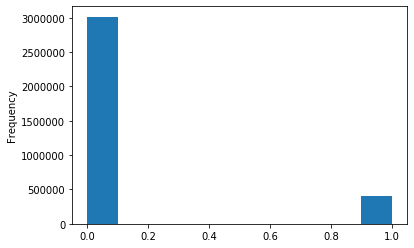

In [13]:
# revisemos los que tienen cambios de aumento de factura 1 vrs los que no
HD['dif_FAC'] = np.where(HD.VAR_FAC>0, 1, 0)
HD['dif_FAC'].plot(kind='hist')
HD['dif_FAC'].value_counts()

In [14]:
#INTENCION DE CANCELACION

warnings.filterwarnings("ignore")

HD['INTENCION_CANCELACION_M1'] = HD['INTENCION_CANCELACION_M1'].fillna(0)
HD['INTENCION_CANCELACION_M2'] = HD['INTENCION_CANCELACION_M2'].fillna(0)
HD['INTENCION_CANCELACION_M3'] = HD['INTENCION_CANCELACION_M3'].fillna(0)
HD['INTENCION_CANCELACION_M4'] = HD['INTENCION_CANCELACION_M4'].fillna(0)

T='INTENCION_CANCEL'

adi=['INTENCION_CANCELACION_M1',
'INTENCION_CANCELACION_M2',
'INTENCION_CANCELACION_M3',
'INTENCION_CANCELACION_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

print(str(HD[HD[T]==1].ACLARACION_FACTURA.mean()))
print(str(HD[HD[T]==0].ACLARACION_FACTURA.mean()))

0.05270318281470698
0.01964626327419584


In [15]:
len(HD)

3423511

In [16]:
# UPGRADE TV

HD['UPGRADE_TV_M1'] = HD['UPGRADE_TV_M1'].fillna(0)
HD['UPGRADE_TV_M2'] = HD['UPGRADE_TV_M2'].fillna(0)
HD['UPGRADE_TV_M3'] = HD['UPGRADE_TV_M3'].fillna(0)
HD['UPGRADE_TV_M4'] = HD['UPGRADE_TV_M4'].fillna(0)

HD.UPGRADE_TV_M4=HD.UPGRADE_TV_M4.astype(int)
HD.UPGRADE_TV_M3=HD.UPGRADE_TV_M3.astype(int)
HD.UPGRADE_TV_M2=HD.UPGRADE_TV_M2.astype(int)
HD.UPGRADE_TV_M1=HD.UPGRADE_TV_M1.astype(int)

T='UPGRADE_TV'

adi=['UPGRADE_TV_M1',
'UPGRADE_TV_M2',
'UPGRADE_TV_M3',
'UPGRADE_TV_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['UPGRADE_TV'].value_counts()


0    3382589
1      40922
Name: UPGRADE_TV, dtype: int64

In [17]:
len(HD)

3423511

In [18]:
# UPGRADE VOZ

HD['UPGRADE_VOZ_M1'] = HD['UPGRADE_VOZ_M1'].fillna(0)
HD['UPGRADE_VOZ_M2'] = HD['UPGRADE_VOZ_M2'].fillna(0)
HD['UPGRADE_VOZ_M3'] = HD['UPGRADE_VOZ_M3'].fillna(0)
HD['UPGRADE_VOZ_M4'] = HD['UPGRADE_VOZ_M4'].fillna(0)

HD.UPGRADE_VOZ_M4=HD.UPGRADE_VOZ_M4.astype(int)
HD.UPGRADE_VOZ_M3=HD.UPGRADE_VOZ_M3.astype(int)
HD.UPGRADE_VOZ_M2=HD.UPGRADE_VOZ_M2.astype(int)
HD.UPGRADE_VOZ_M1=HD.UPGRADE_VOZ_M1.astype(int)

T='UPGRADE_VOZ'

adi=['UPGRADE_VOZ_M1',
'UPGRADE_VOZ_M2',
'UPGRADE_VOZ_M3',
'UPGRADE_VOZ_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['UPGRADE_VOZ'].value_counts()


0    3423511
Name: UPGRADE_VOZ, dtype: int64

In [19]:
# UPGRADE INT

HD['UPGRADE_INT_M1'] = HD['UPGRADE_INT_M1'].fillna(0)
HD['UPGRADE_INT_M2'] = HD['UPGRADE_INT_M2'].fillna(0)
HD['UPGRADE_INT_M3'] = HD['UPGRADE_INT_M3'].fillna(0)
HD['UPGRADE_INT_M4'] = HD['UPGRADE_INT_M4'].fillna(0)

HD.UPGRADE_INT_M4=HD.UPGRADE_INT_M4.astype(int)
HD.UPGRADE_INT_M3=HD.UPGRADE_INT_M3.astype(int)
HD.UPGRADE_INT_M2=HD.UPGRADE_INT_M2.astype(int)
HD.UPGRADE_INT_M1=HD.UPGRADE_INT_M1.astype(int)

T='UPGRADE_INT'

adi=['UPGRADE_INT_M1',
'UPGRADE_INT_M2',
'UPGRADE_INT_M3',
'UPGRADE_INT_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['UPGRADE_INT'].value_counts()

0    2776352
1     647159
Name: UPGRADE_INT, dtype: int64

In [20]:
len(HD)

3423511

In [21]:
#SERVICIOS ADICIONLES INT


HD['COMPRA_SER_ADI_INT_M1'] = HD['COMPRA_SER_ADI_INT_M1'].fillna(0)
HD['COMPRA_SER_ADI_INT_M2'] = HD['COMPRA_SER_ADI_INT_M2'].fillna(0)
HD['COMPRA_SER_ADI_INT_M3'] = HD['COMPRA_SER_ADI_INT_M3'].fillna(0)
HD['COMPRA_SER_ADI_INT_M4'] = HD['COMPRA_SER_ADI_INT_M4'].fillna(0)

HD.COMPRA_SER_ADI_INT_M4=HD.COMPRA_SER_ADI_INT_M4.astype(int)
HD.COMPRA_SER_ADI_INT_M3=HD.COMPRA_SER_ADI_INT_M3.astype(int)
HD.COMPRA_SER_ADI_INT_M2=HD.COMPRA_SER_ADI_INT_M2.astype(int)
HD.COMPRA_SER_ADI_INT_M1=HD.COMPRA_SER_ADI_INT_M1.astype(int)

T='COMPRA_SER_ADI_INT'

adi=['COMPRA_SER_ADI_INT_M1',
'COMPRA_SER_ADI_INT_M2',
'COMPRA_SER_ADI_INT_M3',
'COMPRA_SER_ADI_INT_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['COMPRA_SER_ADI_INT'].value_counts()

1    2857890
0     565621
Name: COMPRA_SER_ADI_INT, dtype: int64

In [22]:
#SERVICIOS ADICIONLES TV


HD['COMPRA_SER_ADI_TV_M1'] = HD['COMPRA_SER_ADI_TV_M1'].fillna(0)
HD['COMPRA_SER_ADI_TV_M2'] = HD['COMPRA_SER_ADI_TV_M2'].fillna(0)
HD['COMPRA_SER_ADI_TV_M3'] = HD['COMPRA_SER_ADI_TV_M3'].fillna(0)
HD['COMPRA_SER_ADI_TV_M4'] = HD['COMPRA_SER_ADI_TV_M4'].fillna(0)

HD.COMPRA_SER_ADI_TV_M4=HD.COMPRA_SER_ADI_TV_M4.astype(int)
HD.COMPRA_SER_ADI_TV_M3=HD.COMPRA_SER_ADI_TV_M3.astype(int)
HD.COMPRA_SER_ADI_TV_M2=HD.COMPRA_SER_ADI_TV_M2.astype(int)
HD.COMPRA_SER_ADI_TV_M1=HD.COMPRA_SER_ADI_TV_M1.astype(int)

T='COMPRA_SER_ADI_TV'

adi=['COMPRA_SER_ADI_TV_M1',
'COMPRA_SER_ADI_TV_M2',
'COMPRA_SER_ADI_TV_M3',
'COMPRA_SER_ADI_TV_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['COMPRA_SER_ADI_TV'].value_counts()

1    3247833
0     175678
Name: COMPRA_SER_ADI_TV, dtype: int64

In [23]:
#SERVICIOS ADICIONLES VOZ

HD['COMPRA_SER_ADI_VOZ_M1'] = HD['COMPRA_SER_ADI_VOZ_M1'].fillna(0)
HD['COMPRA_SER_ADI_VOZ_M2'] = HD['COMPRA_SER_ADI_VOZ_M2'].fillna(0)
HD['COMPRA_SER_ADI_VOZ_M3'] = HD['COMPRA_SER_ADI_VOZ_M3'].fillna(0)
HD['COMPRA_SER_ADI_VOZ_M4'] = HD['COMPRA_SER_ADI_VOZ_M4'].fillna(0)

HD.COMPRA_SER_ADI_VOZ_M4=HD.COMPRA_SER_ADI_VOZ_M4.astype(int)
HD.COMPRA_SER_ADI_VOZ_M3=HD.COMPRA_SER_ADI_VOZ_M3.astype(int)
HD.COMPRA_SER_ADI_VOZ_M2=HD.COMPRA_SER_ADI_VOZ_M2.astype(int)
HD.COMPRA_SER_ADI_VOZ_M1=HD.COMPRA_SER_ADI_VOZ_M1.astype(int)

T='COMPRA_SER_ADI_VOZ'

adi=['COMPRA_SER_ADI_VOZ_M1',
'COMPRA_SER_ADI_VOZ_M2',
'COMPRA_SER_ADI_VOZ_M3',
'COMPRA_SER_ADI_VOZ_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['COMPRA_SER_ADI_VOZ'].value_counts()

0    3400214
1      23297
Name: COMPRA_SER_ADI_VOZ, dtype: int64

In [24]:
#COMPRA TEC

HD['COMPRA_TEC_M1'] = HD['COMPRA_TEC_M1'].fillna(0)
HD['COMPRA_TEC_M2'] = HD['COMPRA_TEC_M2'].fillna(0)
HD['COMPRA_TEC_M3'] = HD['COMPRA_TEC_M3'].fillna(0)
HD['COMPRA_TEC_M4'] = HD['COMPRA_TEC_M4'].fillna(0)

HD.COMPRA_TEC_M4=HD.COMPRA_TEC_M4.astype(int)
HD.COMPRA_TEC_M3=HD.COMPRA_TEC_M3.astype(int)
HD.COMPRA_TEC_M2=HD.COMPRA_TEC_M2.astype(int)
HD.COMPRA_TEC_M1=HD.COMPRA_TEC_M1.astype(int)

T='COMPRA_TEC'

adi=['COMPRA_TEC_M1',
'COMPRA_TEC_M2',
'COMPRA_TEC_M3',
'COMPRA_TEC_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['COMPRA_TEC'].value_counts()

0    3418912
1       4599
Name: COMPRA_TEC, dtype: int64

In [25]:
#COMPRA TER

HD['COMPRA_TER_M1'] = HD['COMPRA_TER_M1'].fillna(0)
HD['COMPRA_TER_M2'] = HD['COMPRA_TER_M2'].fillna(0)
HD['COMPRA_TER_M3'] = HD['COMPRA_TER_M3'].fillna(0)
HD['COMPRA_TER_M4'] = HD['COMPRA_TER_M4'].fillna(0)

HD.COMPRA_TER_M4=HD.COMPRA_TER_M4.astype(int)
HD.COMPRA_TER_M3=HD.COMPRA_TER_M3.astype(int)
HD.COMPRA_TER_M2=HD.COMPRA_TER_M2.astype(int)
HD.COMPRA_TER_M1=HD.COMPRA_TER_M1.astype(int)

T='COMPRA_TER'

adi=['COMPRA_TER_M1',
'COMPRA_TER_M2',
'COMPRA_TER_M3',
'COMPRA_TER_M4']

for i in adi:
    HD[i]=HD[i].astype(int)


HD[T]= np.where(HD[adi[0]]+HD[adi[1]]+
                               HD[adi[2]]+
                               HD[adi[3]]>0, 1, 0)

HD['COMPRA_TER'].value_counts()

0    3406496
1      17015
Name: COMPRA_TER, dtype: int64

In [26]:
HD['EDAD'].isna().sum()

179391

In [27]:
HD['ESTRATO'].value_counts()


2     1351945
3     1042122
4      364637
1      329970
NR     161449
5       98135
6       75071
NG         61
Name: ESTRATO, dtype: int64

In [28]:
len(HD)

3423511

In [29]:
#ESTRATO

HD['ESTRATO']=HD['ESTRATO'].replace('NR', '0')
HD['ESTRATO']=HD['ESTRATO'].replace('NG', '0')
HD['ESTRATO'] = HD['ESTRATO'].fillna(0)
HD['ESTRATO']=HD['ESTRATO'].astype(int)

HD['ESTRATO_CAT']=HD['ESTRATO'].replace([0, 1, 2,3,4,5,6],['Sin_E','Bajo','Bajo','Medio','Medio','Alto','Alto'])

HD['ESTRATO_CAT'].value_counts()

Bajo     1681915
Medio    1406759
Alto      173206
Sin_E     161631
Name: ESTRATO_CAT, dtype: int64

In [30]:
len(HD)

3423511

In [31]:
#ANTIGUEDAD
#HD['MESES_ACTIVO']=HD['MESES_ACTIVO'].astype(int)
HD['MESES_ACTIVO'] = HD['MESES_ACTIVO'].fillna(0)

HD['ANTIGUEDAD_CAT']=HD['MESES_ACTIVO']/12
HD['ANTIGUEDAD_CAT'].value_counts()

bins = [0, 0.5, 1, 2,5,7,10,15,33]

HD['ANTIGUEDAD_CAT'] = pd.cut(HD['ANTIGUEDAD_CAT'], bins)

HD['ANTIGUEDAD_CAT'].value_counts(normalize=True)

(2.0, 5.0]      0.226449
(1.0, 2.0]      0.206704
(0.5, 1.0]      0.121099
(0.0, 0.5]      0.118860
(7.0, 10.0]     0.111572
(10.0, 15.0]    0.108973
(5.0, 7.0]      0.099165
(15.0, 33.0]    0.007177
Name: ANTIGUEDAD_CAT, dtype: float64

In [32]:
len(HD)

3423511

In [33]:
#GENERACION
## HD=HD.dropna(subset=["GENERACION"])
## cambio CI 15-sept-2021. No borrar nulls,  reemplazan por blank
HD['GENERACION'] = HD['GENERACION'].fillna("GEN (NA)")
HD['GENERACION_CAT']=HD['GENERACION']
HD['GENERACION_CAT'].value_counts()

GENERACION X                1136737
GENERACION Y O MILENIALS    1043943
BABY BOOMERS                 690680
GENERACION SILENCIOSA        272977
GEN (NA)                     179391
GENERACION Z                  99783
Name: GENERACION_CAT, dtype: int64

In [34]:
len(HD)

3423511

In [35]:
#VELOCIDAD INTERNET

HD['VELOCIDAD_INTERNET'] = HD['VELOCIDAD_INTERNET'].fillna(0)
HD['VELOCIDAD_INTERNETM']=HD['VELOCIDAD_INTERNET'].astype(int)/1000

bins = [0, 5, 10, 30,45,50,75,160]

HD['INTERNET_CAT'] = pd.cut((HD['VELOCIDAD_INTERNETM']),bins,right=False)
HD['INTERNET_CAT'].value_counts(normalize=True)

[75, 160)    0.356074
[50, 75)     0.190702
[30, 45)     0.164058
[0, 5)       0.133534
[10, 30)     0.090805
[5, 10)      0.038306
[45, 50)     0.026522
Name: INTERNET_CAT, dtype: float64

In [36]:
len(HD)

3423511

In [37]:
#PRODUCTOS
##HD=HD.dropna(subset=["PRODUCTOS"])
## cambio CI 15-sept-2021. No borrar nulls,  reemplazan por blank
HD['PRODUCTOS'] = HD['PRODUCTOS'].fillna("PROD(NA)")
HD['PRODUCTOS_CAT']=HD['PRODUCTOS']
HD['PRODUCTOS_CAT'].value_counts()

TV + @ + VOZ    2173775
@                320131
TV               319589
@ + VOZ          316821
TV + @           261034
PROD(NA)          13324
TV + VOZ          11231
VOZ                7606
Name: PRODUCTOS_CAT, dtype: int64

In [38]:
len(HD)

3423511

In [39]:
#Eliminar sino tiene ciclo de facturación
HD['CICLO_FACTURACION'].isna().sum()
HD=HD.dropna(subset=["CICLO_FACTURACION"])

In [40]:
#CICLO FACTURACION
i='CICLO_FACTURACION'
HD[i]=HD[i].astype(int)

HD[i+'_CAT']=HD[i].astype(int)
print(HD[i+'_CAT'].value_counts())

2     1372725
1     1271231
3      771654
19       7901
Name: CICLO_FACTURACION_CAT, dtype: int64


In [41]:
HD['ACLARACION_FACTURA'].value_counts()


0    3352437
1      71074
Name: ACLARACION_FACTURA, dtype: int64

In [42]:
#HD=HD.dropna(subset=["INTERNET_CAT"])
#HD=HD.dropna(subset=["ANTIGUEDAD_CAT"])
#HD=HD.dropna(subset=["ANTIGUEDAD_CAT"])
#HD=HD.dropna(subset=["DEPARTAMENTO"])

## cambio CI 15-sept-2021. No borrar nulls,  reemplazan por blank
HD['INTERNET_CAT']=HD['INTERNET_CAT'].cat.add_categories('INT(NA)')
HD['INTERNET_CAT'] = HD['INTERNET_CAT'].fillna("INT(NA)")

HD['ANTIGUEDAD_CAT']=HD['ANTIGUEDAD_CAT'].cat.add_categories('ANT(NA)')
HD['ANTIGUEDAD_CAT'] = HD['ANTIGUEDAD_CAT'].fillna("ANT(NA)")

HD['DEPARTAMENTO'] = HD['DEPARTAMENTO'].fillna("DEP(NA)")

print(HD['TIPO_TV'].value_counts())
HD['TIPO_TV'] = HD['TIPO_TV'].fillna("DIGITAL (NA)")

DIGITAL (P)         1618199
DIGITAL (B)          741704
TV SATELITAL (B)     141835
TV SATELITAL (A)     108109
DIGITAL (A)           60584
DIGITAL (S)           45960
DIGITAL (NA)          36571
TV SATELITAL (S)      11869
DIGITAL (F)             731
BASICO TV                67
Name: TIPO_TV, dtype: int64


In [43]:
len(HD)

3423511

In [44]:
HD.isna().sum()

CUENTA                        0
MES_EJECUCION                 0
ACLARACION_FACTURA            0
VALOR_FACTURA_MES_ANTERIOR    0
VALOR_FACTURA_MES_ACTUAL      0
                             ..
GENERACION_CAT                0
VELOCIDAD_INTERNETM           0
INTERNET_CAT                  0
PRODUCTOS_CAT                 0
CICLO_FACTURACION_CAT         0
Length: 71, dtype: int64

In [45]:
HD=HD.drop(['COMPRA_TEC_M1', 'COMPRA_TEC_M2', 'COMPRA_TEC_M3', 'COMPRA_TEC_M4',
         'COMPRA_TER_M1', 'COMPRA_TER_M2', 'COMPRA_TER_M3', 'COMPRA_TER_M4',
        'COMPRA_SER_ADI_VOZ_M1', 'COMPRA_SER_ADI_VOZ_M2', 'COMPRA_SER_ADI_VOZ_M3', 'COMPRA_SER_ADI_VOZ_M4',
         'COMPRA_SER_ADI_INT_M1', 'COMPRA_SER_ADI_INT_M2', 'COMPRA_SER_ADI_INT_M3', 'COMPRA_SER_ADI_INT_M4',
         'COMPRA_SER_ADI_TV_M1', 'COMPRA_SER_ADI_TV_M2', 'COMPRA_SER_ADI_TV_M3', 'COMPRA_SER_ADI_TV_M4',
         'UPGRADE_VOZ_M1', 'UPGRADE_VOZ_M2', 'UPGRADE_VOZ_M3', 'UPGRADE_VOZ_M4', 'UPGRADE_INT_M1', 'UPGRADE_INT_M2',
         'UPGRADE_INT_M3', 'UPGRADE_INT_M4', 'UPGRADE_TV_M1', 'UPGRADE_TV_M2', 'UPGRADE_TV_M3', 'UPGRADE_TV_M4',
            'INTENCION_CANCELACION_M1', 'INTENCION_CANCELACION_M2', 'INTENCION_CANCELACION_M3', 'INTENCION_CANCELACION_M4'
        ], axis=1)

In [46]:
len(HD)

3423511

In [47]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3423511 entries, 0 to 3423510
Data columns (total 35 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   CUENTA                      int64   
 1   MES_EJECUCION               int64   
 2   ACLARACION_FACTURA          int64   
 3   VALOR_FACTURA_MES_ANTERIOR  float64 
 4   VALOR_FACTURA_MES_ACTUAL    int64   
 5   DOCUMENTO                   object  
 6   DEPARTAMENTO                object  
 7   ESTRATO                     int64   
 8   MESES_ACTIVO                int64   
 9   FECHA_DX                    object  
 10  TIPO_TV                     object  
 11  VELOCIDAD_INTERNET          float64 
 12  PRODUCTOS                   object  
 13  CICLO_FACTURACION           int64   
 14  EDAD                        float64 
 15  GENERACION                  object  
 16  SUSPENSION                  int64   
 17  VAR_FAC                     float64 
 18  dif_FAC                     int64   
 19  

In [48]:
HD['TOTAL']= 1

COL=['TOTAL','ESTRATO_CAT',
     'ANTIGUEDAD_CAT','PRODUCTOS_CAT',
     'INTERNET_CAT','GENERACION_CAT',
     'CICLO_FACTURACION_CAT']

FIL=['dif_FAC','INTENCION_CANCEL','UPGRADE_TV','UPGRADE_INT','COMPRA_SER_ADI_INT',
     'COMPRA_SER_ADI_TV','COMPRA_SER_ADI_VOZ','COMPRA_TEC','COMPRA_TER','SUSPENSION']



for i in COL:
    HD[i+'_'] = HD[i]
    FIL.append(i+'_')


In [49]:
i

'CICLO_FACTURACION_CAT'

In [50]:
## borrar validación
##pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[6],aggfunc='count',fill_value=0)
HD[COL[6]].head(5)

0    2
1    2
2    1
3    3
4    2
Name: CICLO_FACTURACION_CAT, dtype: int64

In [51]:
COL

['TOTAL',
 'ESTRATO_CAT',
 'ANTIGUEDAD_CAT',
 'PRODUCTOS_CAT',
 'INTERNET_CAT',
 'GENERACION_CAT',
 'CICLO_FACTURACION_CAT']

In [52]:
FIL

['dif_FAC',
 'INTENCION_CANCEL',
 'UPGRADE_TV',
 'UPGRADE_INT',
 'COMPRA_SER_ADI_INT',
 'COMPRA_SER_ADI_TV',
 'COMPRA_SER_ADI_VOZ',
 'COMPRA_TEC',
 'COMPRA_TER',
 'SUSPENSION',
 'TOTAL_',
 'ESTRATO_CAT_',
 'ANTIGUEDAD_CAT_',
 'PRODUCTOS_CAT_',
 'INTERNET_CAT_',
 'GENERACION_CAT_',
 'CICLO_FACTURACION_CAT_']

In [53]:
pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[FIL[0]],columns=COL[6],aggfunc='count',fill_value=0)

CICLO_FACTURACION_CAT,1,2,3,19
dif_FAC,,,,
0,1126562,1205127,677312,7514
1,144669,167598,94342,387


In [54]:
pd.pivot_table(HD,values='ACLARACION_FACTURA',index=['SUSPENSION'],columns='GENERACION_CAT',aggfunc='count',fill_value=0)

GENERACION_CAT,BABY BOOMERS,GEN (NA),GENERACION SILENCIOSA,GENERACION X,GENERACION Y O MILENIALS,GENERACION Z
SUSPENSION,,,,,,
0,665386,176542,265142,1085437,984837,92508
1,25294,2849,7835,51300,59106,7275


In [55]:
'SUSPENSION'

'SUSPENSION'

In [56]:
HD.columns

Index(['CUENTA', 'MES_EJECUCION', 'ACLARACION_FACTURA',
       'VALOR_FACTURA_MES_ANTERIOR', 'VALOR_FACTURA_MES_ACTUAL', 'DOCUMENTO',
       'DEPARTAMENTO', 'ESTRATO', 'MESES_ACTIVO', 'FECHA_DX', 'TIPO_TV',
       'VELOCIDAD_INTERNET', 'PRODUCTOS', 'CICLO_FACTURACION', 'EDAD',
       'GENERACION', 'SUSPENSION', 'VAR_FAC', 'dif_FAC', 'INTENCION_CANCEL',
       'UPGRADE_TV', 'UPGRADE_VOZ', 'UPGRADE_INT', 'COMPRA_SER_ADI_INT',
       'COMPRA_SER_ADI_TV', 'COMPRA_SER_ADI_VOZ', 'COMPRA_TEC', 'COMPRA_TER',
       'ESTRATO_CAT', 'ANTIGUEDAD_CAT', 'GENERACION_CAT',
       'VELOCIDAD_INTERNETM', 'INTERNET_CAT', 'PRODUCTOS_CAT',
       'CICLO_FACTURACION_CAT', 'TOTAL', 'TOTAL_', 'ESTRATO_CAT_',
       'ANTIGUEDAD_CAT_', 'PRODUCTOS_CAT_', 'INTERNET_CAT_', 'GENERACION_CAT_',
       'CICLO_FACTURACION_CAT_'],
      dtype='object')

In [57]:
### fin validacion

In [58]:
for i in FIL:
    #TOTAL
    C1=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[0],aggfunc='count',fill_value=0)
    #ESTRATO_CAT
    C2=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[1],aggfunc='count',fill_value=0)
    #ANTIGUEDAD_CAT
    C3=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[2],aggfunc='count',fill_value=0)
    #PRODUCTOS_CAT
    C4=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[3],aggfunc='count',fill_value=0)
    #INTERNET_CAT
    C5=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[4],aggfunc='count',fill_value=0)
    #GENERACION_CAT
    C6=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[5],aggfunc='count',fill_value=0)
    #CICLO_FACTURACION_CAT
    C7=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[6],aggfunc='count',fill_value=0)
    
    
    T1=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[0],aggfunc='mean',fill_value=0)
    T2=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[1],aggfunc='mean',fill_value=0)    
    T3=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[2],aggfunc='mean',fill_value=0)
    T4=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[3],aggfunc='mean',fill_value=0)
    T5=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[4],aggfunc='mean',fill_value=0)
    T6=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[5],aggfunc='mean',fill_value=0)
    T7=pd.pivot_table(HD,values='ACLARACION_FACTURA',index=[i],columns=COL[6],aggfunc='mean',fill_value=0)
    
    
    
    final=pd.concat([C1,T1*100,T2*100,T3*100,T4*100,T5*100,T6*100,T7*100, C2,C3,C4,C5,C6,C7],axis=1)
    final['var']=i
    
    if i=='dif_FAC': 
        result = final
    else:   
        frames = [result,final]
        result = pd.concat(frames)


In [59]:
result

,1,1,Alto,Bajo,Medio,Sin_E,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 2.0]","(2.0, 5.0]",...,GEN (NA),GENERACION SILENCIOSA,GENERACION X,GENERACION Y O MILENIALS,GENERACION Z,1,2,3,19,var
0,3016515,1.676338,1.199768,1.875556,1.617614,0.743214,2.614791,1.921615,1.733179,1.608436,...,167296,249197,1003651,897243,80928,1126562,1205127,677312,7514,dif_FAC
1,406996,5.038624,3.991505,5.118578,5.150948,2.983125,3.920175,4.910197,4.926706,5.915370,...,12095,23780,133086,146700,18855,144669,167598,94342,387,dif_FAC
0,3308110,1.964626,1.398140,2.185773,1.902083,0.815190,2.977041,2.073363,1.892383,1.890876,...,176525,266429,1097905,1000863,95759,1231015,1320841,748462,7792,INTENCION_CANCEL
1,115401,5.270318,3.502342,5.868006,5.089796,2.449278,6.560914,4.929062,5.033331,5.352583,...,2866,6548,38832,43080,4024,40216,51884,23192,109,INTENCION_CANCEL
0,3382589,2.029540,1.435292,2.254786,1.967937,0.865761,2.990376,2.132033,2.013798,1.988794,...,178777,268694,1122850,1032321,98611,1256825,1353406,764458,7900,UPGRADE_TV
1,40922,5.921020,3.130435,6.870791,5.404698,2.395210,7.101865,5.748219,6.779661,5.738605,...,614,4283,13887,11622,1172,14406,19319,7196,1,UPGRADE_TV
0,2776352,1.871953,1.316795,2.147736,1.779195,0.831633,2.957134,1.970369,1.850035,1.766506,...,174018,228403,909326,827354,78056,1063177,1059965,646497,6713,UPGRADE_INT
1,647159,2.951670,2.531457,2.833729,3.213652,1.916106,3.851383,3.168232,2.507492,3.211192,...,5373,44574,227411,216589,21727,208054,312760,125157,1188,UPGRADE_INT
0,565621,1.744631,1.143870,1.974082,1.481506,0.368209,2.926026,2.205645,1.974293,1.582154,...,94537,52476,153609,146395,16696,196148,138853,230559,61,COMPRA_SER_ADI_INT
1,2857890,2.141650,1.482039,2.402702,2.077645,0.979352,3.089125,2.159285,2.050553,2.085467,...,84854,220501,983128,897548,83087,1075083,1233872,541095,7840,COMPRA_SER_ADI_INT


In [60]:
pfR = os.path.join(dir,'3. Resultado','ANALISIS_HOGAR_202112.csv')  
export_csv =result.to_csv (pfR,sep =';') 
result

,1,1,Alto,Bajo,Medio,Sin_E,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 2.0]","(2.0, 5.0]",...,GEN (NA),GENERACION SILENCIOSA,GENERACION X,GENERACION Y O MILENIALS,GENERACION Z,1,2,3,19,var
0,3016515,1.676338,1.199768,1.875556,1.617614,0.743214,2.614791,1.921615,1.733179,1.608436,...,167296,249197,1003651,897243,80928,1126562,1205127,677312,7514,dif_FAC
1,406996,5.038624,3.991505,5.118578,5.150948,2.983125,3.920175,4.910197,4.926706,5.915370,...,12095,23780,133086,146700,18855,144669,167598,94342,387,dif_FAC
0,3308110,1.964626,1.398140,2.185773,1.902083,0.815190,2.977041,2.073363,1.892383,1.890876,...,176525,266429,1097905,1000863,95759,1231015,1320841,748462,7792,INTENCION_CANCEL
1,115401,5.270318,3.502342,5.868006,5.089796,2.449278,6.560914,4.929062,5.033331,5.352583,...,2866,6548,38832,43080,4024,40216,51884,23192,109,INTENCION_CANCEL
0,3382589,2.029540,1.435292,2.254786,1.967937,0.865761,2.990376,2.132033,2.013798,1.988794,...,178777,268694,1122850,1032321,98611,1256825,1353406,764458,7900,UPGRADE_TV
1,40922,5.921020,3.130435,6.870791,5.404698,2.395210,7.101865,5.748219,6.779661,5.738605,...,614,4283,13887,11622,1172,14406,19319,7196,1,UPGRADE_TV
0,2776352,1.871953,1.316795,2.147736,1.779195,0.831633,2.957134,1.970369,1.850035,1.766506,...,174018,228403,909326,827354,78056,1063177,1059965,646497,6713,UPGRADE_INT
1,647159,2.951670,2.531457,2.833729,3.213652,1.916106,3.851383,3.168232,2.507492,3.211192,...,5373,44574,227411,216589,21727,208054,312760,125157,1188,UPGRADE_INT
0,565621,1.744631,1.143870,1.974082,1.481506,0.368209,2.926026,2.205645,1.974293,1.582154,...,94537,52476,153609,146395,16696,196148,138853,230559,61,COMPRA_SER_ADI_INT
1,2857890,2.141650,1.482039,2.402702,2.077645,0.979352,3.089125,2.159285,2.050553,2.085467,...,84854,220501,983128,897548,83087,1075083,1233872,541095,7840,COMPRA_SER_ADI_INT
